In [24]:
!pip install fabio
import os
import fabio
import tensorflow as tf
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
def view_cbf(file_path):
  try:
    #Load .cbf file
    image = fabio.open(file_path)

    #Print the data
    print("\nData: ")
    print(image.data)

    return image.data, image.data.shape[1], image.data.shape[0] #return dimensions/array

  #Exception case
  except Exception as e:
    print("Error:", e)
    return None, None, None

In [ ]:
def load_cbf_images(directory_path):
    images = []
    for filename in os.listdir(directory_path):
        if filename.endswith(".cbf"):
            file_path = os.path.join(directory_path, filename)
            image = fabio.open(file_path).data
            images.append(image)
    return images

In [ ]:
# Functions to generate images
def generate_white_image(width, height):
    white_image = np.full((height, width), 255, dtype=np.uint8)
    return white_image

In [ ]:
def load_and_preprocess_images(directory_path, size=(200, 200)):
    images = []
    try:
        for filename in os.listdir(directory_path):
            if filename.endswith(".png"):
                file_path = os.path.join(directory_path, filename)
                img = Image.open(file_path).convert('L')  # Convert to grayscale
                img_resized = img.resize(size, Image.ANTIALIAS)
                img_array = np.array(img_resized)
                images.append(img_array)

        if len(images) == 0:
            raise ValueError(f"No images found in directory: {directory_path}")

        images = np.array(images) / 255.0  # Normalize the images
        return images

    except Exception as e:
        print(f"Error loading and preprocessing images: {e}")
        return None

def create_labels(images, label):
    labels = [label] * len(images)
    return np.array(labels)

def split_dataset(images, labels, test_size=0.2):
    try:
        train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=test_size, random_state=42)
        return train_images, test_images, train_labels, test_labels
    except ValueError as ve:
        print(f"Error splitting dataset: {ve}")
        return None, None, None, None

In [ ]:
def convert_cbf_to_png(cbf_file_path, png_file_path):
    try:
        # Load the .cbf file
        image = fabio.open(cbf_file_path)
        image_data = image.data

        print(f"Dimensions of the image: {image_data.shape}")

        # Normalize the image data (optional, depending on your image data range)
        normalized_image_data = (image_data - np.min(image_data)) / (np.max(image_data) - np.min(image_data)) * 255
        normalized_image_data = normalized_image_data.astype(np.uint8)

        # Save the image data as a .png file
        img = Image.fromarray(normalized_image_data)
        img.save(png_file_path)
        print(f"Converted {cbf_file_path} to {png_file_path} successfully.")
    except Exception as e:
        print(f"Error converting {cbf_file_path}: {e}")

In [ ]:
def show_png(png_file_path):
    try:
        img = Image.open(png_file_path)
        plt.imshow(img, cmap='gray_r', origin='upper', vmin=0, vmax=50)
        plt.axis('off')  # Hide axes
        plt.title('Converted PNG Image')
        plt.show()
    except Exception as e:
        print(f"Error displaying {png_file_path}: {e}")

In [ ]:
def resize_image(input_png_path, output_png_path, size=(200, 200)):
    try:
        img = Image.open(input_png_path)
        print(f"Original image dimensions: {img.size}")
        resized_img = img.resize(size, Image.ANTIALIAS)
        print(f"Resized image dimensions: {resized_img.size}")
        resized_img.save(output_png_path)
        print(f"Resized image saved to {output_png_path}")
    except Exception as e:
        print(f"Error resizing image {input_png_path}: {e}")

In [ ]:
def batch_process_cbf_to_png_and_resize(input_directory, output_directory, size=(200, 200)):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    for filename in os.listdir(input_directory):
        if filename.endswith(".cbf"):
            cbf_file_path = os.path.join(input_directory, filename)
            png_file_name = filename.replace(".cbf", ".png")
            png_file_path = os.path.join(output_directory, png_file_name)
            resized_png_file_path = os.path.join(output_directory, f"resized_{png_file_name}")

            # Convert the .cbf file to .png
            convert_cbf_to_png(cbf_file_path, png_file_path)


In [25]:
# Load and preprocess images
input_directory_pos = "/content/drive/MyDrive/metal2"
output_directory_pos = "/content/drive/MyDrive/output"

# Load and preprocess images
images_pos = load_and_preprocess_images(output_directory_pos, size=(200, 200))
images_pos = images_pos / 255.0  # Normalize the images

# Create labels (assuming binary classification: all images labeled as 1)
labels_pos = create_labels(images_pos, 0)

# Load and preprocess images
input_directory_neg = "/content/drive/MyDrive/stuff3"
output_directory_neg = "/content/drive/MyDrive/output3"

# Load and preprocess images
images_neg = load_and_preprocess_images(output_directory_neg, size=(200, 200))
images_neg = images_neg / 255.0  # Normalize the images

# Create labels (assuming binary classification: all images labeled as 1)
labels_neg = create_labels(images_neg, 1)

#input_directory_next = "/content/drive/MyDrive/stuff6"
#output_directory_next = "/content/drive/MyDrive/output6"

# Load and preprocess images
#images_next = load_and_preprocess_images(output_directory_next, size=(200, 200))
#images_next = images_next / 255.0  # Normalize the images

# Create labels (assuming binary classification: all images labeled as 1)
#labels_next = create_labels(images_next, 2)

# Concatenate the images and labels
combined_images = np.concatenate((images_pos, images_neg), axis=0)
combined_labels = np.concatenate((labels_pos, labels_neg), axis=0)

# Split the dataset
train_images, test_images, train_labels, test_labels = split_dataset(combined_images, combined_labels)

<ipython-input-7-22a7683897dd>:8: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_resized = img.resize(size, Image.ANTIALIAS)


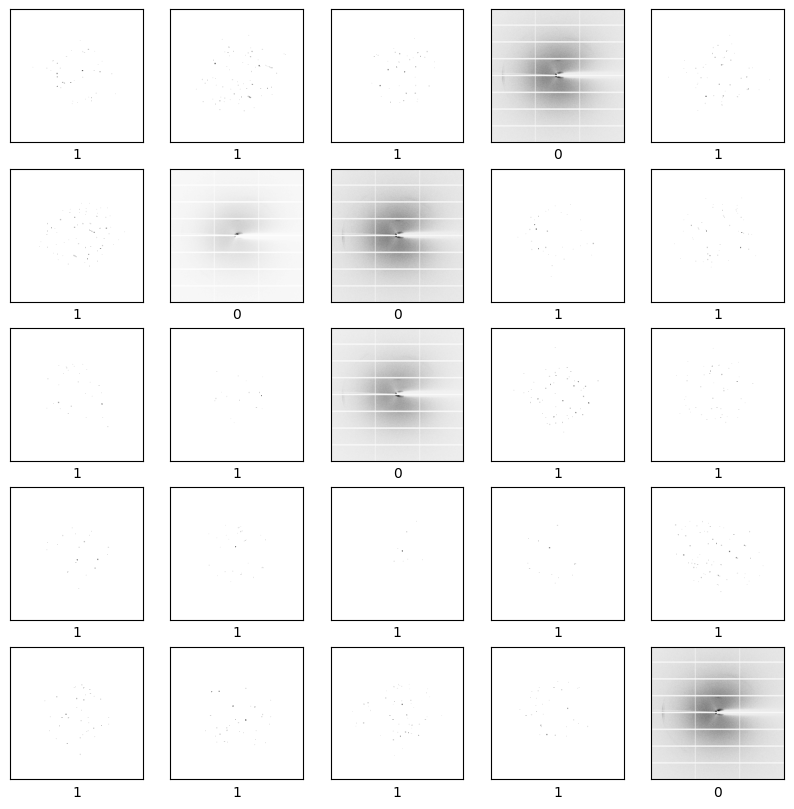

In [26]:
# Display some example images with their labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [27]:
# Build and compile the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(200, 200)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)  # Assuming binary classification
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.9215 - loss: 0.6636
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.9988 - loss: 0.5024
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.9973 - loss: 0.3261
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.9992 - loss: 0.1787
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.9998 - loss: 0.0984
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.9994 - loss: 0.0640
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.9994 - loss: 0.0463
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 0.9997 - loss: 0.0334
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.9973 - loss: 0.0558
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9996 - loss: 0.0233


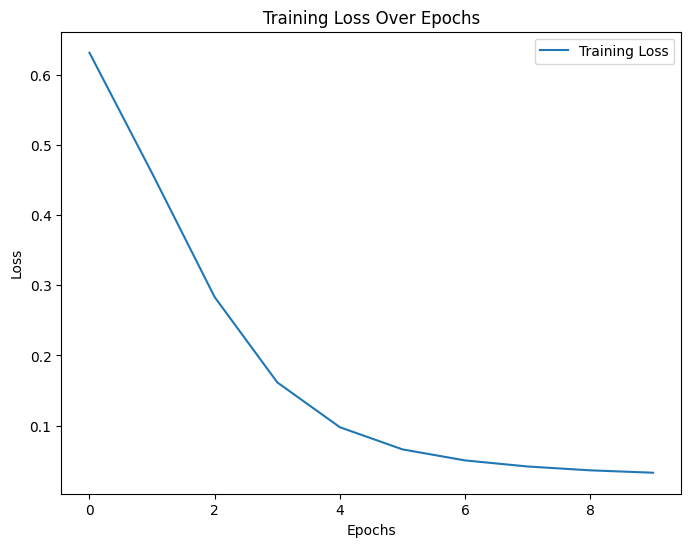

In [28]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

Maybe change epoch or batch size amount

In [29]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

7/7 - 0s - 55ms/step - accuracy: 1.0000 - loss: 0.0144

Test accuracy: 1.0


In [30]:
# Create the probability model
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

# Make predictions
predictions = probability_model.predict(test_images)

# Define class names
class_names = ['White Image', 'Dot Image']
predicted_labels = np.argmax(predictions, axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step



F1 score: 1.0


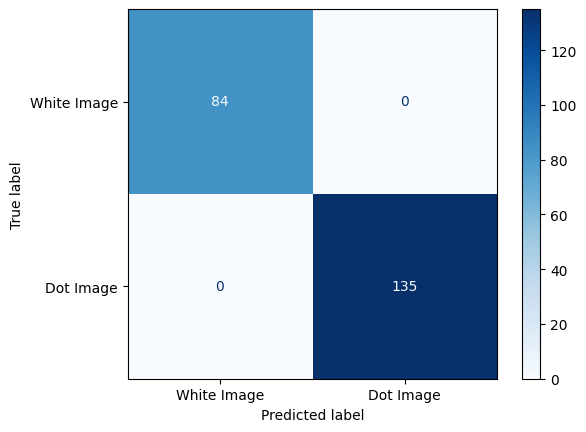

In [31]:
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
# Calculate and print the F1 score
f1 = f1_score(test_labels, predicted_labels)
print('\nF1 score:', f1)

# Calculate and display the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['White Image', 'Dot Image'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                  100*np.max(predictions_array),
                                  true_label),
                                  color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(2))  # Only 2 classes
    plt.yticks([])
    thisplot = plt.bar(range(2), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

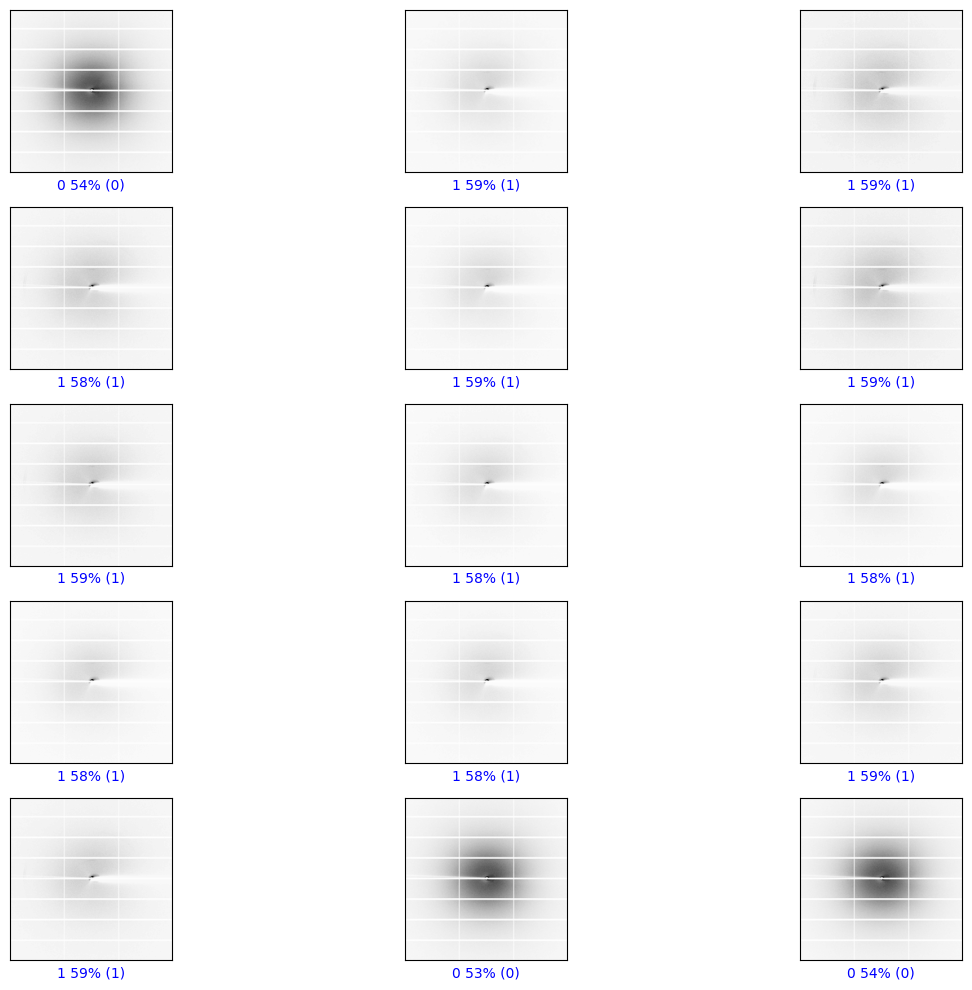

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
plt.tight_layout()
plt.show()

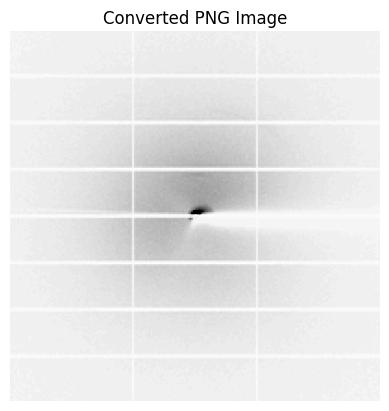